In [1]:
import numpy as np

def Round(number: float, precision: int = 4) -> float:
    factor = 10 ** precision
    return round(float(number) * factor) / factor

def MakeVectors(*args) -> np.ndarray:
    return np.array(object=args)

def DotProduct(matrix: np.ndarray, vector: np.ndarray) -> np.ndarray:
    return np.dot(matrix, vector)

# =============================================================================

def TransitionMatrix(matrix: list) -> np.ndarray:
    return MakeVectors(*matrix)

def PeopleVector(people_industry: int, people_academia: int) -> np.ndarray:
    return MakeVectors(people_industry, people_academia)

# =============================================================================

def CalculatePeopleDistribution(percent: float, total_people: int) -> int:
    return percent * total_people, (1 - percent) * total_people

def CalculatePeopleInitialState(
    total_people: int, percentage_industry: float = None,  percentage_academia: float = None, 
) -> np.ndarray:

    if percentage_industry is not None:
        people_industry, people_academia = CalculatePeopleDistribution(percentage_industry, total_people)
        return PeopleVector(people_industry, people_academia)

    elif percentage_academia is not None:
        people_academia, people_industry = CalculatePeopleDistribution(percentage_academia, total_people)
        return PeopleVector(people_industry, people_academia)
    
    else:
        raise ValueError("Either percentage_industry or percentage_academia must be provided.")

def CalculatePeopleNextYear(transition_matrix: np.ndarray, people: np.ndarray) -> np.ndarray:
    return DotProduct(transition_matrix, people)

# =============================================================================

def UnpackData(history: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    X_axis = history[:, 0]
    Y_axis_industry = history[:, 1]
    Y_axis_academia = history[:, 2]
    return X_axis, Y_axis_industry, Y_axis_academia

# =============================================================================

def FindChangeYears(people_history: list[tuple[int, np.ndarray]]) -> list[int]:
    X_axis, Y_axis_industry, Y_axis_academia = UnpackData(people_history)
    leader_array = np.sign(Y_axis_industry - Y_axis_academia)
    change_indices = np.where(leader_array[:-1] != leader_array[1:])[0]
    change_years = X_axis[change_indices + 1]
    return change_years.tolist()



In [ ]:
def SimulateYears(
    initial_year: int, period_of_time: int,
    people: np.ndarray, transition_matrix: np.ndarray, 
    total_people: int, percentage_industry: float,
    step: int = 1,
) -> np.ndarray:

    history = []
    
    start = initial_year
    stop = initial_year + period_of_time
    
    history.append([Round(percentage_industry), total_people, start, Round(people[0]), Round(people[1])])

    for year in range(start + 1, stop + 1, step):
        people = CalculatePeopleNextYear(transition_matrix, people)
        history.append([Round(percentage_industry), total_people, year, Round(people[0]), Round(people[1])])

    return np.array(history, dtype=object)

def Simulation(
    total_people: int,
    percentage_people_industry: float,
    initial_year: int,
    period_of_time: int,
    transition_matrix: np.ndarray,

    qnt_sample_total_people: int = 5,
    step_sample_total_people: int = 10_000,

    qnt_sample_percentage_people_industry: int = 5,
    step_sample_percentage_people_industry: float = 0.1,
) -> np.ndarray:
    
    all_results = []

    for i in range(qnt_sample_total_people):
        total_people_i = total_people + i * step_sample_total_people

        for j in range(qnt_sample_percentage_people_industry):
            percentage_people_industry_j = percentage_people_industry + j * step_sample_percentage_people_industry
            
            people = CalculatePeopleInitialState(
                total_people=total_people_i, 
                percentage_industry=percentage_people_industry_j,
            )

            peopleHistory = SimulateYears(
                people=people,
                initial_year=initial_year,
                period_of_time=period_of_time,
                transition_matrix=transition_matrix,
                
                total_people=total_people_i, # Pass total_people here
                percentage_industry=percentage_people_industry_j, # Pass percentage here
            )

            all_results.append(peopleHistory)

    return all_results


In [3]:
T = [
    [0.99, 0.2], 
    [0.01, 0.8],
]

transitionMatrix = TransitionMatrix(matrix=T)

In [30]:
totalPeople = 10_000
percentagePeopleIndustry = 0.1

initialYear = 2025
periodOfTime = 20
finalYear = initialYear + periodOfTime

qntSampleTotalPeople = 8
stepSampleTotalPeople = 10_000

qntSamplePercentagePeopleIndustry = 9
stepSamplePercentagePeopleIndustry = 0.1



In [ ]:

Responses = Simulation(
    total_people = totalPeople,
    initial_year = initialYear,
    period_of_time = periodOfTime,
    transition_matrix = transitionMatrix,
    percentage_people_industry = percentagePeopleIndustry,

    qnt_sample_total_people = qntSampleTotalPeople,
    step_sample_total_people = stepSampleTotalPeople,
    
    qnt_sample_percentage_people_industry=qntSamplePercentagePeopleIndustry,
    step_sample_percentage_people_industry=stepSamplePercentagePeopleIndustry,
)


In [73]:
def GetTicks(initial_value: float, final_value: float, num_ticks: int = 21, dtype: object = int) -> np.ndarray:
    return np.linspace(initial_value, final_value, num_ticks, dtype=dtype)

def GetMinMaxValues(*args: list[float], delta_up: float = 1.1, delta_down: float = 0.8) -> tuple[float, float]:
    return min(min(arg) for arg in args) * delta_down, max(max(arg) for arg in args) * delta_up

def GetGraphicParameters(
    people_history: list[tuple[int, np.ndarray]],
    initial_year: int, period_of_time: int,
) -> dict[str, object]:
    
    X_axis, Y_axis_industry, Y_axis_academia = UnpackData(people_history)
    Y_min, Y_max = GetMinMaxValues(Y_axis_industry, Y_axis_academia)
    
    return X_axis, Y_axis_industry, Y_axis_academia, {
        'Y_min': Y_min, 'Y_max': Y_max,
        'X_ticks': GetTicks(initial_value = initial_year, final_value = initial_year + period_of_time), 
        'Y_ticks': GetTicks(initial_value=Y_min, final_value=Y_max, dtype=float), 
    }

def GetMax(Array: list[np.ndarray]) -> tuple[list[float], list[float]]:
    return max(Array)

def GetMin(Array: list[np.ndarray]) -> tuple[list[float], list[float]]:
    return min(Array)


In [83]:
AllMaximus, AllMinimus = [], []

for response in Responses:
    u, v = response[:, -2], response[:, -1]
    AllMaximus.append(max(GetMax(u), GetMax(v)))
    AllMinimus.append(min(GetMin(u), GetMin(v)))

Maximus, Minimus = max(AllMaximus), min(AllMinimus)
Maximus, Minimus

(76152.9093, 480.8863)

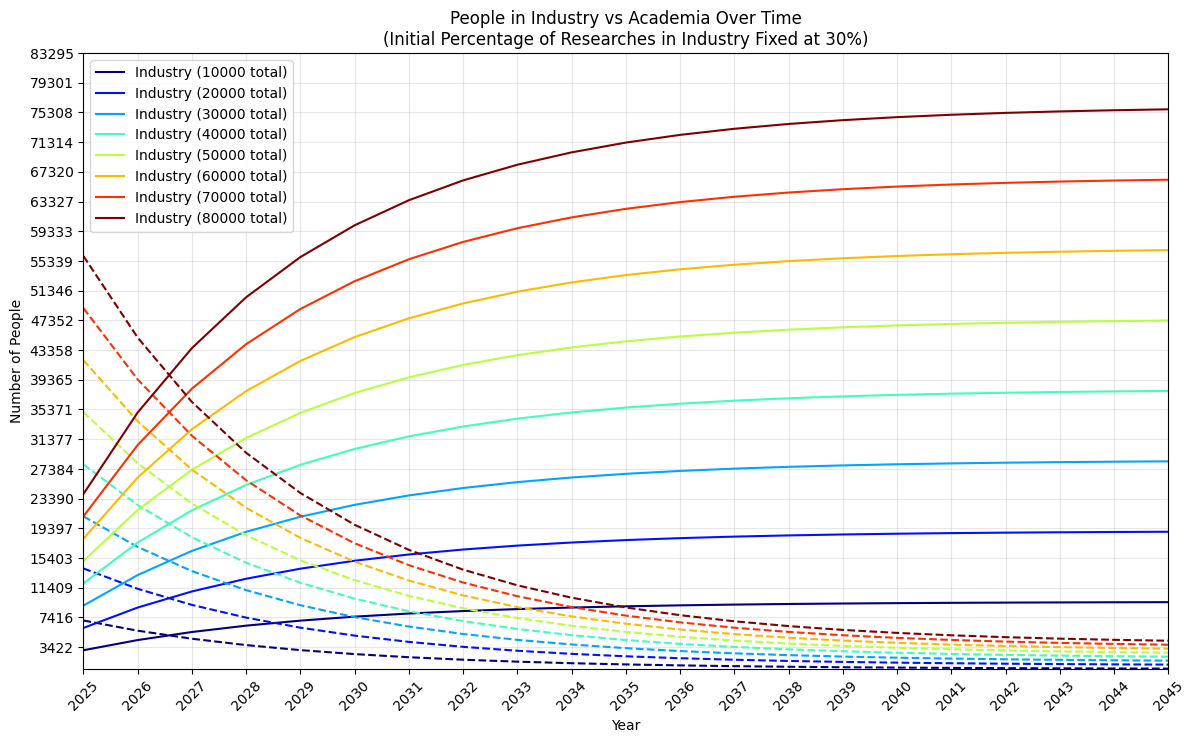

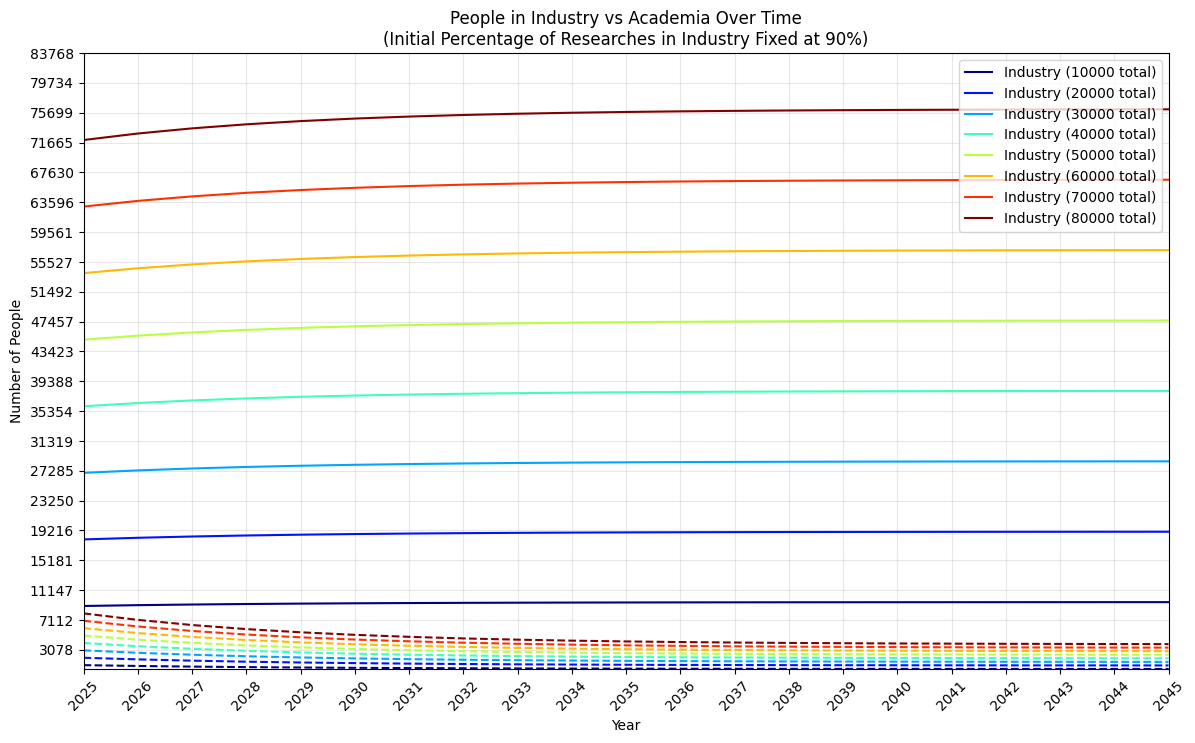

In [84]:
import matplotlib.pyplot as plt


def PlotByFixedPercentage(responses, percentage_index: int):
    plt.figure(figsize=(14, 8))

    # Flatten the list of arrays into a single 2D array
    data_flat = np.concatenate(responses, axis=0) 
    
    # Get the specific percentage to filter by
    target_percentage = np.unique(data_flat[:, 0])[percentage_index]

    # Filter data for the current percentage
    data_at_percentage = data_flat[data_flat[:, 0] == target_percentage]
    
    # Get unique total people counts and create a color map
    total_people_counts = np.unique(data_at_percentage[:, 1])
    colors = plt.cm.jet(np.linspace(0, 1, len(total_people_counts)))


    Y_ticks_min = 100_000
    # Plot each simulation run with a unique color
    for i, total_people in enumerate(total_people_counts):
        
        # Filter data for the current total people count
        current_data = data_at_percentage[data_at_percentage[:, 1] == total_people]

        # Unpack the data
        years = current_data[:, 2]
        industry = current_data[:, 3]
        academia = current_data[:, 4]

        Y_min, Y_max = GetMinMaxValues(industry, academia)
        X_ticks = GetTicks(initial_value=years[0], final_value=years[-1])
        Y_ticks = GetTicks(initial_value=Y_min, final_value=Y_max, dtype=float)
        
        if Y_min < Y_ticks_min:
            Y_ticks_min = Y_min

        # Plot Industry and Academia on the same axes with the same color
        plt.plot(years, industry, color=colors[i], linestyle='-', label=f'Industry ({total_people:.0f} total)')
        plt.plot(years, academia, color=colors[i], linestyle='--')


    plt.ylim(Minimus, Maximus); plt.yticks(Y_ticks)
    plt.xlim(years[0], years[-1]); plt.xticks(X_ticks, rotation=45)
    
    plt.title(f'People in Industry vs Academia Over Time\n(Initial Percentage of Researches in Industry Fixed at {target_percentage:.0%})')
    plt.xlabel('Year'); plt.ylabel('Number of People')
    plt.legend(); plt.grid(alpha=0.3); plt.show()

# Example usage: Plot for the third percentage sample (30% initial)
PlotByFixedPercentage(Responses, percentage_index=2)
PlotByFixedPercentage(Responses, percentage_index=8)


In [ ]:
AllMaximus, AllMinimus = [], []

for response in Responses:
    u, v = response[:, -2], response[:, -1]
    AllMaximus.append(max(GetMax(u), GetMax(v)))
    AllMinimus.append(min(GetMin(u), GetMin(v)))


AllMaximus, AllMinimus

([9447.3951,
  9456.3599,
  9465.3247,
  9474.2895,
  9483.2544,
  9492.2192,
  9501.184,
  9510.1488,
  9519.1137,
  18894.7901,
  18912.7198,
  18930.6494,
  18948.5791,
  18966.5087,
  18984.4384,
  19002.368,
  19020.2977,
  19038.2273,
  28342.1852,
  28369.0797,
  28395.9741,
  28422.8686,
  28449.7631,
  28476.6576,
  28503.552,
  28530.4465,
  28557.341,
  37789.5802,
  37825.4395,
  37861.2988,
  37897.1581,
  37933.0174,
  37968.8767,
  38004.7361,
  38040.5954,
  38076.4547,
  47236.9753,
  47281.7994,
  47326.6236,
  47371.4477,
  47416.2718,
  47461.0959,
  47505.9201,
  47550.7442,
  47595.5683,
  56684.3704,
  56738.1593,
  56791.9483,
  56845.7372,
  56899.5262,
  56953.3151,
  57007.1041,
  57060.893,
  57114.682,
  66131.7654,
  66194.5192,
  66257.273,
  66320.0268,
  66382.7805,
  66445.5343,
  66508.2881,
  66571.0419,
  66633.7956,
  75579.1605,
  75650.8791,
  75722.5977,
  75794.3163,
  75866.0349,
  75937.7535,
  76009.4721,
  76081.1907,
  76152.9093],
 [552.6

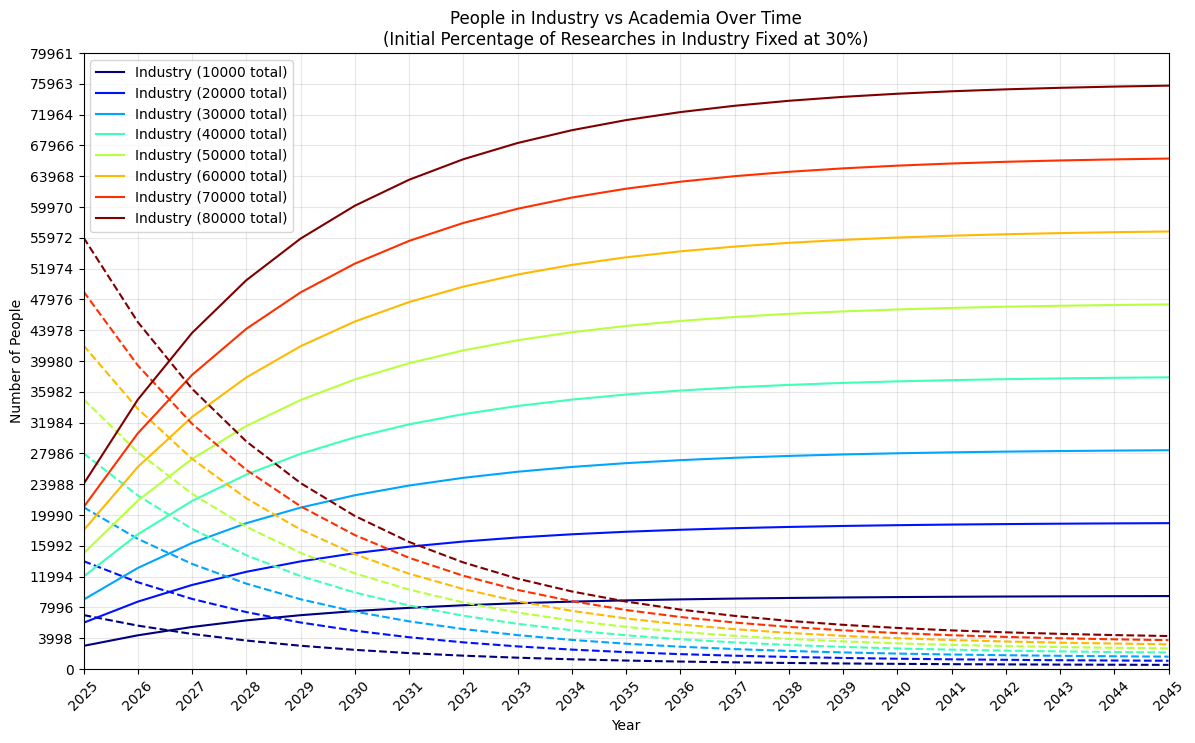

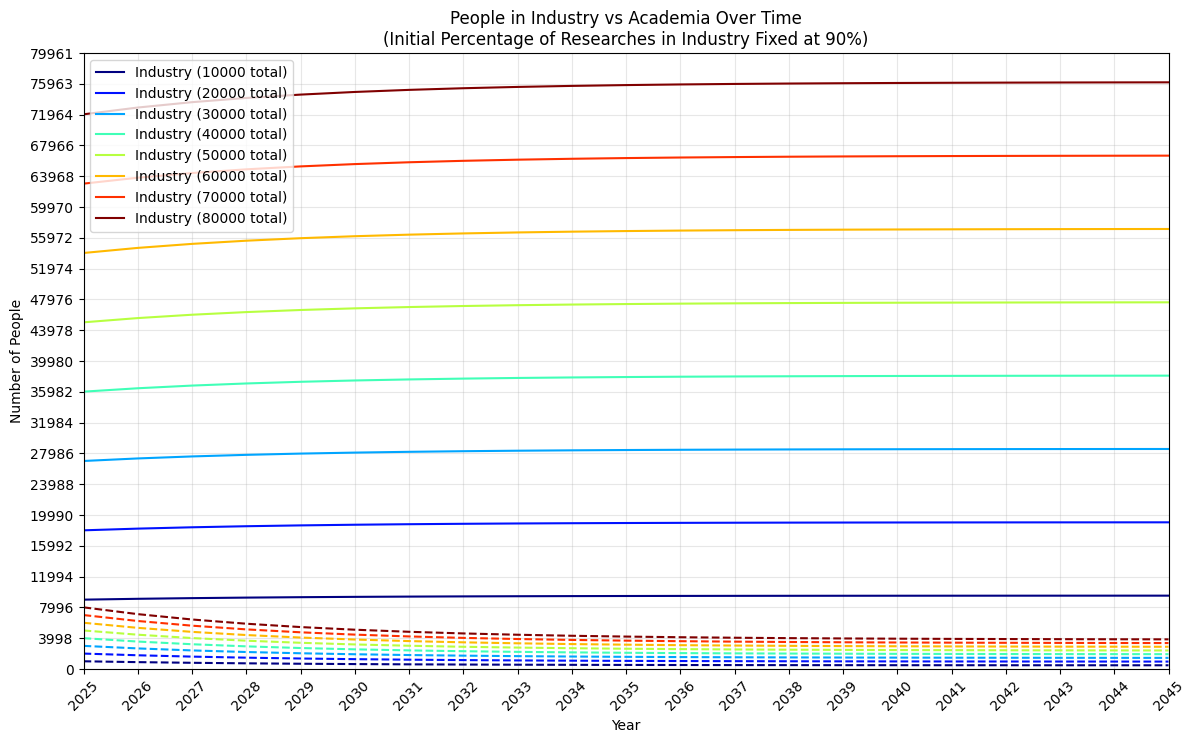

In [85]:
import matplotlib.pyplot as plt

def PlotByFixedPercentage(responses, percentage_index: int):
    plt.figure(figsize=(14, 8))

    # Flatten the list of arrays into a single 2D array
    data_flat = np.concatenate(responses, axis=0) 
    
    # Get the specific percentage to filter by
    target_percentage = np.unique(data_flat[:, 0])[percentage_index]

    # Filter data for the current percentage
    data_at_percentage = data_flat[data_flat[:, 0] == target_percentage]
    
    # Get unique total people counts and create a color map
    total_people_counts = np.unique(data_at_percentage[:, 1])
    colors = plt.cm.jet(np.linspace(0, 1, len(total_people_counts)))

    # Plot each simulation run with a unique color
    for i, total_people in enumerate(total_people_counts):
        
        # Filter data for the current total people count
        current_data = data_at_percentage[data_at_percentage[:, 1] == total_people]

        # Unpack the data
        years = current_data[:, 2]
        industry = current_data[:, 3]
        academia = current_data[:, 4]

        # Plot Industry and Academia on the same axes with the same color
        plt.plot(years, industry, color=colors[i], linestyle='-', label=f'Industry ({total_people:.0f} total)')
        plt.plot(years, academia, color=colors[i], linestyle='--')

    # Set Y-axis from 0 to Maximus with padding
    Y_max_padded = Maximus * 1.05  # Add 5% padding at the top
    Y_ticks = GetTicks(initial_value=0, final_value=Y_max_padded, dtype=float)
    
    # Set X-axis ticks
    X_ticks = GetTicks(initial_value=years[0], final_value=years[-1])
    
    plt.ylim(0, Y_max_padded); plt.yticks(Y_ticks)
    plt.xlim(years[0], years[-1]); plt.xticks(X_ticks, rotation=45)
    
    plt.title(f'People in Industry vs Academia Over Time\n(Initial Percentage of Researches in Industry Fixed at {target_percentage:.0%})')
    plt.xlabel('Year'); plt.ylabel('Number of People')
    plt.legend(); plt.grid(alpha=0.3); plt.show()

# Example usage: Plot for the third percentage sample (30% initial)
PlotByFixedPercentage(Responses, percentage_index=2)
PlotByFixedPercentage(Responses, percentage_index=8)

In [86]:
def AnalyzeConvergence(values_list, tolerance=0.01, window_size=5):
    """
    Analyze convergence of a list of values.
    
    Parameters:
    - values_list: List of numerical values
    - tolerance: Maximum difference between consecutive values to consider converged
    - window_size: Number of consecutive values to check for stability
    
    Returns:
    - Dictionary with convergence analysis
    """
    values = np.array(values_list)
    
    # Calculate differences between consecutive values
    differences = np.abs(np.diff(values))
    
    # Find convergence point (where differences become consistently small)
    convergence_point = None
    converged_value = None
    
    for i in range(len(differences) - window_size + 1):
        window = differences[i:i + window_size]
        if np.all(window < tolerance):
            convergence_point = i + window_size
            converged_value = np.mean(values[convergence_point:])
            break
    
    return {
        'converged': convergence_point is not None,
        'convergence_point': convergence_point,
        'converged_value': converged_value,
        'final_value': values[-1],
        'max_difference_in_last_5': np.max(differences[-5:]) if len(differences) >= 5 else np.max(differences),
        'mean_of_last_5': np.mean(values[-5:]) if len(values) >= 5 else np.mean(values),
        'std_of_last_5': np.std(values[-5:]) if len(values) >= 5 else np.std(values)
    }

def GroupAndAnalyzeConvergence(all_maximus, all_minimus, num_groups=9):
    """
    Group the values and analyze convergence for each group.
    Assumes values are grouped by simulation parameters.
    """
    group_size = len(all_maximus) // num_groups
    
    print("=== CONVERGENCE ANALYSIS ===\n")
    
    for group_idx in range(num_groups):
        start_idx = group_idx * group_size
        end_idx = start_idx + group_size
        
        max_group = all_maximus[start_idx:end_idx]
        min_group = all_minimus[start_idx:end_idx]
        
        max_analysis = AnalyzeConvergence(max_group)
        min_analysis = AnalyzeConvergence(min_group)
        
        print(f"GROUP {group_idx + 1}:")
        print(f"  Maximums - Converged: {max_analysis['converged']}, Final: {max_analysis['final_value']:.4f}")
        print(f"  Minimums - Converged: {min_analysis['converged']}, Final: {min_analysis['final_value']:.4f}")
        print(f"  Min Std (last 5): {min_analysis['std_of_last_5']:.6f}")
        print()

# Run the analysis
GroupAndAnalyzeConvergence(AllMaximus, AllMinimus)

=== CONVERGENCE ANALYSIS ===

GROUP 1:
  Maximums - Converged: False, Final: 9510.1488
  Minimums - Converged: False, Final: 489.8512
  Min Std (last 5): 12.678170

GROUP 2:
  Maximums - Converged: False, Final: 19002.3680
  Minimums - Converged: False, Final: 997.6320
  Min Std (last 5): 25.356354

GROUP 3:
  Maximums - Converged: False, Final: 28476.6576
  Minimums - Converged: False, Final: 1523.3424
  Min Std (last 5): 38.034538

GROUP 4:
  Maximums - Converged: False, Final: 37933.0174
  Minimums - Converged: False, Final: 2066.9826
  Min Std (last 5): 50.712708

GROUP 5:
  Maximums - Converged: False, Final: 47371.4477
  Minimums - Converged: False, Final: 2628.5523
  Min Std (last 5): 312.132557

GROUP 6:
  Maximums - Converged: False, Final: 56791.9483
  Minimums - Converged: False, Final: 3208.0517
  Min Std (last 5): 410.720081

GROUP 7:
  Maximums - Converged: False, Final: 66194.5192
  Minimums - Converged: False, Final: 3805.4808
  Min Std (last 5): 441.566117

GROUP 8:
  

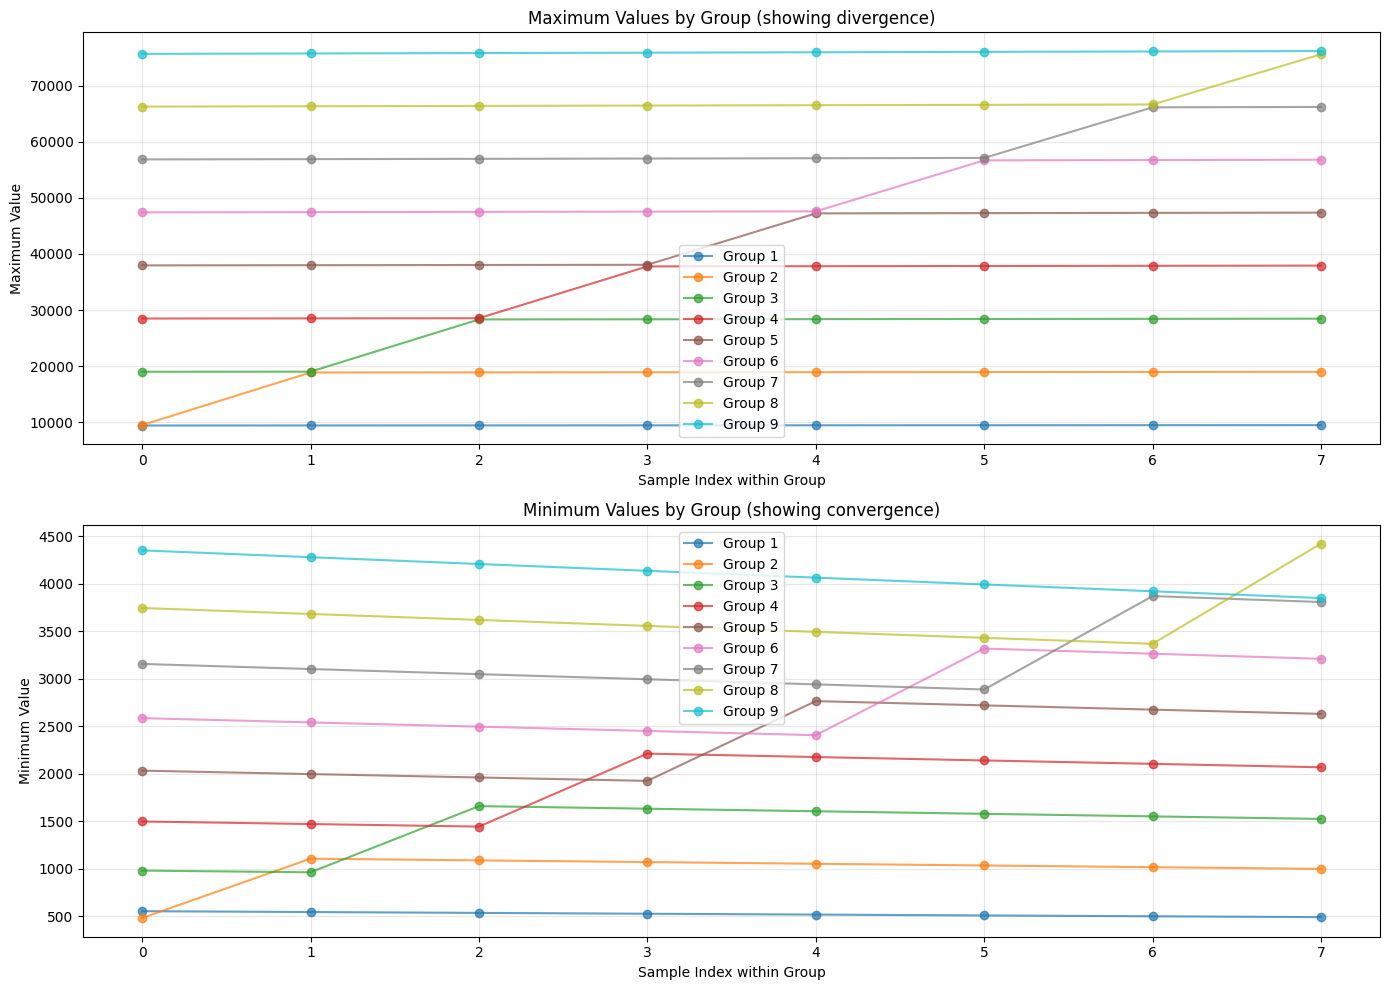

In [87]:
def PlotConvergenceAnalysis(all_maximus, all_minimus, num_groups=9):
    """
    Plot convergence analysis for each group.
    """
    group_size = len(all_maximus) // num_groups
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    colors = plt.cm.tab10(np.linspace(0, 1, num_groups))
    
    for group_idx in range(num_groups):
        start_idx = group_idx * group_size
        end_idx = start_idx + group_size
        
        max_group = all_maximus[start_idx:end_idx]
        min_group = all_minimus[start_idx:end_idx]
        
        x_values = range(len(max_group))
        
        # Plot maximums
        axes[0].plot(x_values, max_group, 'o-', color=colors[group_idx], 
                    label=f'Group {group_idx + 1}', alpha=0.7)
        
        # Plot minimums
        axes[1].plot(x_values, min_group, 'o-', color=colors[group_idx], 
                    label=f'Group {group_idx + 1}', alpha=0.7)
    
    axes[0].set_title('Maximum Values by Group (showing divergence)')
    axes[0].set_xlabel('Sample Index within Group')
    axes[0].set_ylabel('Maximum Value')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].set_title('Minimum Values by Group (showing convergence)')
    axes[1].set_xlabel('Sample Index within Group')
    axes[1].set_ylabel('Minimum Value')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create convergence plot
PlotConvergenceAnalysis(AllMaximus, AllMinimus)

In [99]:
def TestConvergenceWithDelta(values_list, delta_radius=1.0, min_stable_points=3):
    """
    Test if values converge within a delta radius.
    
    Parameters:
    - values_list: List of values to test
    - delta_radius: Maximum allowed deviation from mean
    - min_stable_points: Minimum number of consecutive points within delta
    
    Returns:
    - Boolean indicating convergence and analysis details
    """
    values = np.array(values_list)
    
    # Check the last few values
    last_values = values[-min_stable_points:]
    mean_value = np.mean(last_values)
    max_deviation = np.max(np.abs(last_values - mean_value))
    
    converged = max_deviation <= delta_radius
    
    return {
        'converged_within_delta': converged,
        'delta_radius': delta_radius,
        'mean_value': mean_value,
        'max_deviation': max_deviation,
        'last_values': last_values.tolist(),
        'convergence_ratio': max_deviation / delta_radius if delta_radius > 0 else float('inf')
    }

# Test convergence for minimum values
print("=== DELTA-RADIUS CONVERGENCE TEST ===\n")

group_size = len(AllMinimus) // 9
for group_idx in range(9):
    start_idx = group_idx * group_size
    end_idx = start_idx + group_size
    
    min_group = AllMinimus[start_idx:end_idx]
    convergence_test = TestConvergenceWithDelta(min_group, delta_radius=100.0)
    
    print(f"Group {group_idx + 1}:")
    print(f"  Converged within δ=5.0: {convergence_test['converged_within_delta']}")
    print(f"  Mean value: {convergence_test['mean_value']:.4f}")
    print(f"  Max deviation: {convergence_test['max_deviation']:.4f}")
    print(f"  Convergence ratio: {convergence_test['convergence_ratio']:.4f}")
    print()

=== DELTA-RADIUS CONVERGENCE TEST ===

Group 1:
  Converged within δ=5.0: True
  Mean value: 498.8160
  Max deviation: 8.9648
  Convergence ratio: 0.0896

Group 2:
  Converged within δ=5.0: True
  Mean value: 1015.5616
  Max deviation: 17.9297
  Convergence ratio: 0.1793

Group 3:
  Converged within δ=5.0: True
  Mean value: 1550.2369
  Max deviation: 26.8945
  Convergence ratio: 0.2689

Group 4:
  Converged within δ=5.0: True
  Mean value: 2102.8419
  Max deviation: 35.8593
  Convergence ratio: 0.3586

Group 5:
  Converged within δ=5.0: True
  Mean value: 2673.3764
  Max deviation: 44.8242
  Convergence ratio: 0.4482

Group 6:
  Converged within δ=5.0: True
  Mean value: 3261.8407
  Max deviation: 53.7890
  Convergence ratio: 0.5379

Group 7:
  Converged within δ=5.0: False
  Mean value: 3519.6778
  Max deviation: 634.3598
  Convergence ratio: 6.3436

Group 8:
  Converged within δ=5.0: False
  Mean value: 3738.6673
  Max deviation: 682.1722
  Convergence ratio: 6.8217

Group 9:
  Conv